In [1]:
%tensorflow_version 2.x 

In [2]:
from tensorflow import keras

In [3]:
keras.__version__

'2.3.0-tf'

In [5]:
import tensorflow as tf

In [6]:
tf.__version__

'2.2.0'

In [32]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# x_train -> images for training = 60K
# y_train -> labels for training = 60K
# x_test -> images for testing = 10K
# y_test -> labels for testing = 10K

In [8]:
x_train.shape
# 60000 = number of images
# 28 x 28 = dimensions per image

(60000, 28, 28)

In [ ]:
"""
(60000, 28, 28, 3) - for RGB images
"""

In [9]:
y_train.shape
# 60000 = number of labels

(60000,)

In [11]:
import matplotlib.pyplot as plt

5


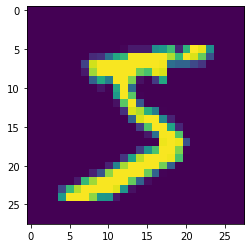

In [12]:
plt.imshow(x_train[0])
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


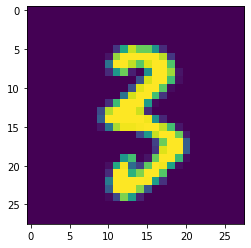

In [16]:
plt.imshow(x_train[45000])
print(y_train[45000])

In [ ]:
""" Data Pre-Processing

Images: Scaling (using MinMaxScaling)
Labels: Categorical (OneHotEncoding using to_categorical function)

"""

In [14]:
x_train = x_train / 255.0

In [15]:
y_train = keras.utils.to_categorical(y_train)

In [17]:

# y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Completed Preprocessing
# Start Modeling now

In [30]:
model = keras.models.Sequential()

# Input Layer

## Flatten the input images

model.add(keras.layers.Flatten( input_shape = (28, 28) ))

# Add Hidden Layer(s) -- uses relu

## Always try to take the # of neurons as the power of 2. 
## Image shape after flattened = 784
## 2 to power 8 = 512

model.add(keras.layers.Dense(512, activation=keras.activations.relu)) # First Hidden Layer

# model.add(keras.layers.Dense(256, activation=keras.activations.relu)) # Second Hidden Layer - not needed here!

# Output Layer -- uses softmax
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
784*512 + 512 # 784 x 512 = Weights ; 512 = Biases

401920

In [21]:
512 * 10 + 10 # 512 x 10 = Weights ; 10 = Biases

5130

In [22]:
401920 + 5130

407050

In [23]:
60000*784 # Total # of Inputs

47040000

In [31]:

model.compile(optimizer=keras.optimizers.SGD() , loss= keras.losses.categorical_crossentropy, metrics=['acc'])

# categorical, binary, sparse - important entropies

model.fit(x_train, y_train, epochs = 10,batch_size=64)


Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8101 - acc: 0.8155
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3941 - acc: 0.8960
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3326 - acc: 0.9091
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3002 - acc: 0.9171
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2777 - acc: 0.9226
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2601 - acc: 0.9277
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2453 - acc: 0.9320
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2325 - acc: 0.9355
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2214 - acc: 0.9387
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2112 - acc: 0.9418


In [60]:
937.5*64

60000.0

In [27]:
??model.fit

In [29]:
60000/64

937.5

In [33]:
x_test = x_test / 255.0

7


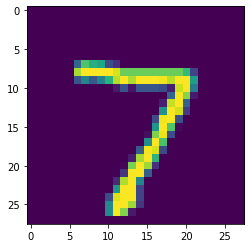

In [35]:
plt.imshow(x_test[0])

print(y_test[0])

In [37]:
model.input_shape

(None, 28, 28)

In [38]:
import numpy as np

In [39]:
testimage = np.expand_dims(x_test[0], axis=0)  # Introduces more dimensionality to the data

In [41]:
x_test[0].shape, testimage.shape

((28, 28), (1, 28, 28))

In [42]:


model.predict(testimage)

array([[1.0315658e-04, 5.3372071e-07, 4.3825366e-04, 2.2027565e-03,
        1.4837909e-06, 5.0754796e-05, 5.1676462e-08, 9.9681562e-01,
        2.3523848e-05, 3.6388714e-04]], dtype=float32)

In [43]:
np.argmax(model.predict(testimage))

7

In [44]:
x_test.shape 

(10000, 28, 28)

In [45]:
y_predicted = model.predict(x_test) 

In [46]:
y_predicted

array([[1.03156475e-04, 5.33720197e-07, 4.38253221e-04, ...,
        9.96815622e-01, 2.35238240e-05, 3.63886938e-04],
       [1.30915549e-03, 4.07390799e-05, 9.76572692e-01, ...,
        1.36560026e-08, 1.11680769e-03, 1.62966629e-07],
       [6.06786089e-05, 9.70215917e-01, 1.09124985e-02, ...,
        5.98844141e-03, 5.04614506e-03, 7.49018916e-04],
       ...,
       [9.33782133e-07, 1.32628884e-06, 2.86006816e-05, ...,
        1.02265645e-03, 5.98612521e-03, 2.58961674e-02],
       [2.44540657e-04, 2.55596387e-04, 3.69872869e-05, ...,
        1.21597732e-05, 1.75053719e-02, 3.82069447e-05],
       [7.66906014e-05, 1.35612250e-08, 4.07994085e-04, ...,
        4.79509410e-09, 1.33845458e-06, 7.05155543e-08]], dtype=float32)

In [47]:
y_predicted[0]

array([1.03156475e-04, 5.33720197e-07, 4.38253221e-04, 2.20275554e-03,
       1.48378956e-06, 5.07547447e-05, 5.16764622e-08, 9.96815622e-01,
       2.35238240e-05, 3.63886938e-04], dtype=float32)

In [48]:
np.argmax(y_predicted[0])

7

In [51]:
y_pred = np.argmax(y_predicted, axis=1) # axis = 1 runs the function on each row

In [52]:
(y_pred == y_test)

array([ True,  True,  True, ...,  True,  True,  True])

In [54]:
(y_pred == y_test).sum()

9407

In [ ]:
# 94.07% accurate

In [55]:
np.where(y_pred != y_test)

(array([   8,   33,   92,  124,  149,  233,  241,  247,  259,  300,  313,
         318,  320,  321,  340,  341,  352,  362,  381,  412,  435,  444,
         445,  448,  449,  479,  495,  502,  507,  511,  531,  543,  551,
         565,  578,  582,  591,  613,  619,  627,  628,  629,  659,  684,
         689,  691,  707,  717,  720,  740,  760,  839,  844,  881,  882,
         890,  898,  924,  938,  939,  947,  950,  951,  956,  959,  965,
         982, 1014, 1032, 1039, 1044, 1062, 1068, 1073, 1082, 1096, 1107,
        1112, 1114, 1119, 1128, 1173, 1181, 1182, 1192, 1194, 1198, 1204,
        1206, 1224, 1226, 1232, 1234, 1242, 1247, 1256, 1260, 1270, 1283,
        1289, 1299, 1310, 1319, 1325, 1326, 1328, 1337, 1378, 1391, 1393,
        1410, 1413, 1429, 1433, 1440, 1444, 1466, 1467, 1494, 1500, 1522,
        1525, 1527, 1530, 1549, 1553, 1559, 1569, 1581, 1587, 1609, 1634,
        1640, 1681, 1709, 1717, 1718, 1751, 1754, 1765, 1772, 1773, 1790,
        1800, 1813, 1828, 1850, 1857, 

5
6


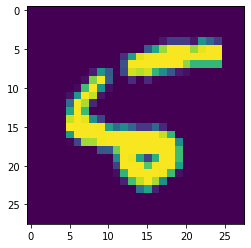

In [56]:
plt.imshow(x_test[8])
print(y_test[8])
print(y_pred[8])

3
5


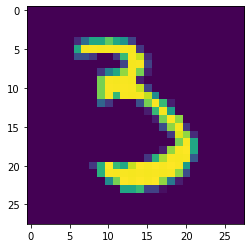

In [59]:
plt.imshow(x_test[3110])
print(y_test[3110])
print(y_pred[3110])

7
4


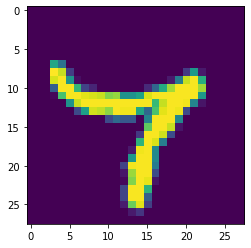

In [58]:
plt.imshow(x_test[124])
print(y_test[124])
print(y_pred[124])